In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


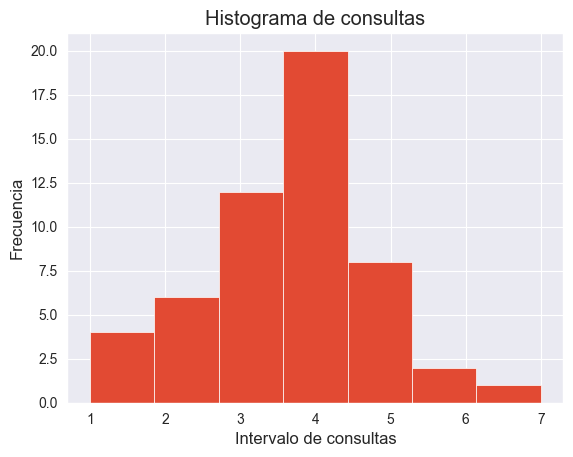

In [197]:
df = pd.read_csv('consultas.csv')
plt.title('Histograma de consultas')
plt.xlabel('Intervalo de consultas')
plt.ylabel('Frecuencia')
plt.hist(df['Dias'], bins=7)
plt.show()

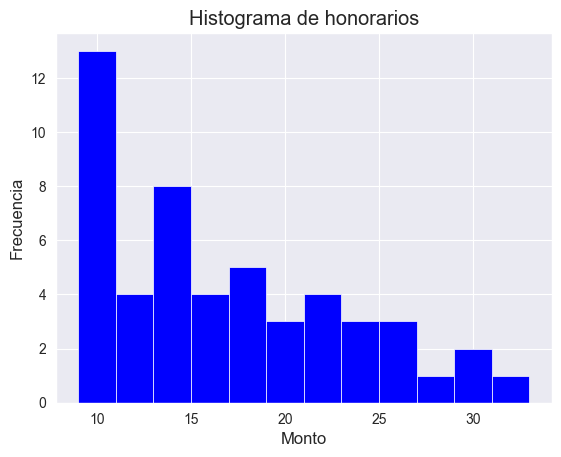

In [198]:
df = pd.read_csv('honorarios.csv')
plt.title('Histograma de honorarios')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.hist(df['honorarios_completos'], color='blue', bins=12)   
plt.show()

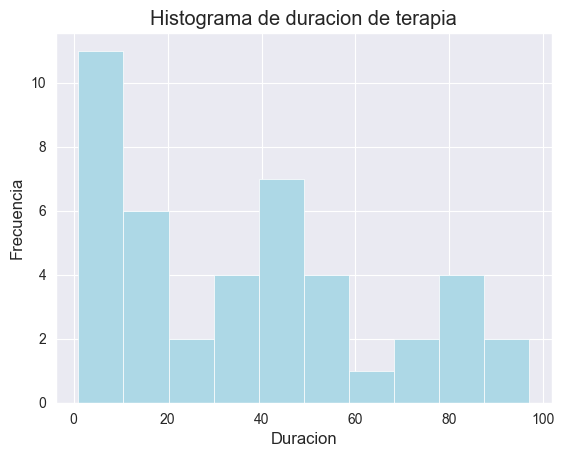

In [215]:
df = pd.read_csv('duracionterapia.csv')
plt.title('Histograma de duracion de terapia')
plt.xlabel('Duracion')
plt.ylabel('Frecuencia')
plt.hist(df['Duracion'], color='lightblue', bins=10)
plt.show()

2024-05-06 01:24:53.430 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-06 01:24:53.645 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=64.089801)
2024-05-06 01:24:53.691 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=62.865454)
2024-05-06 01:24:53.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=62.32998)
2024-05-06 01:24:53.835 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=62.932701)
2024-05-06 01:24:53.921 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=61.788303)
2024-05-06 01:24:53.934 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=62.111864)
2024-05-06 01:24:54.189 | INFO     | fitter.fitter:_fit_single_distribution:

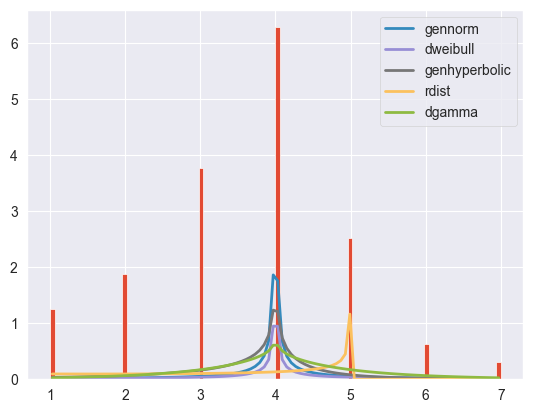

In [216]:
import pickle
from fitter import Fitter

df = pd.read_csv('consultas.csv')
fitter_llegadas = Fitter(df["Dias"])
fitter_llegadas.fit()
fitter_llegadas.summary()
with open('fitter_llegadas.pkl', 'wb') as f:
    pickle.dump(fitter_llegadas, f)

2024-05-06 01:26:23.284 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-06 01:26:24.389 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.98441)
2024-05-06 01:26:24.527 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=1.112737)
2024-05-06 01:26:25.061 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=1.077544)
2024-05-06 01:26:25.251 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=1.143241)
2024-05-06 01:26:25.517 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.953571)
2024-05-06 01:26:25.945 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with error=1.071858)
2024-05-06 01:26:25.962 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fi

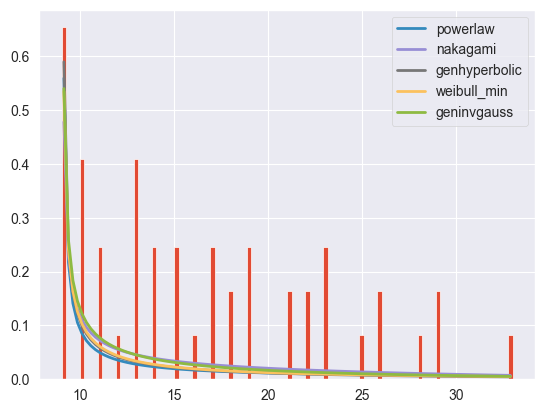

In [217]:
df = pd.read_csv('honorarios.csv')
fitter_honorarios = Fitter(df['honorarios_completos'])
fitter_honorarios.fit()
fitter_honorarios.summary()
with open('fitter_honorarios.pkl', 'wb') as f:
    pickle.dump(fitter_honorarios, f)

2024-05-06 01:28:56.671 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-06 01:28:58.394 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.025963)
2024-05-06 01:28:59.424 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.022784)
2024-05-06 01:28:59.560 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.027685)
2024-05-06 01:28:59.611 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.027056)
2024-05-06 01:29:00.698 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.027195)
2024-05-06 01:29:01.119 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.022568)
2024-05-06 01:29:01.297 | INFO     | fitter.fitter:_fit_single_distribution:337 - 

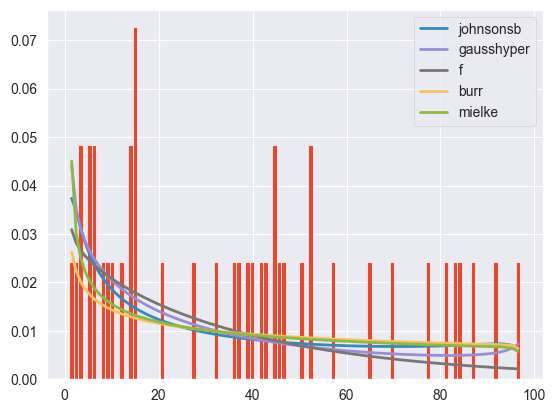

In [218]:
df_duracion = pd.read_csv('duracionterapia.csv')
fitter_duracion = Fitter(df_duracion['Duracion'])
fitter_duracion.fit()
fitter_duracion.summary()
with open('fitter_duracion.pkl', 'wb') as f:
    pickle.dump(fitter_duracion, f)

In [220]:
best_llegadas = fitter_llegadas.get_best()["gennorm"]
best_honorarios = fitter_honorarios.get_best()["powerlaw"]
best_duracion = fitter_duracion.get_best()["johnsonsb"]

print(best_llegadas)
print(best_honorarios)
print(best_duracion)

{'beta': 0.09988947689055722, 'loc': 3.998961573541849, 'scale': 1.6248371198774156e-11}
{'a': 0.14349017715809642, 'loc': 8.999999999999998, 'scale': 24.000000000000004}
{'a': 0.42361987798205225, 'b': 0.4946976129904108, 'loc': 0.8047291306002482, 'scale': 97.27293102030796}


In [232]:
from scipy.stats import gennorm, powerlaw, johnsonsb

def generate_and_plot_distribution(dist_name, params, num_samples=1000, bins=30):
    # Generate random samples from the specified distribution
    dist = globals()[dist_name]
    samples = dist.rvs(size=num_samples, **params)

    # Plot histogram with frequency instead of density
    plt.hist(samples, bins=bins)
    plt.title(f'Histogram of Random Samples from {dist_name.capitalize()} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


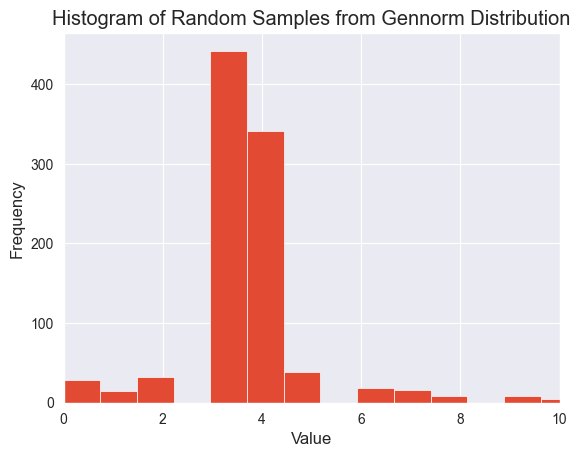

In [254]:
samples = []
while len(samples) < 1000:
    r = int(gennorm.rvs(beta= 0.09988947689055722, loc=3.998961573541849, scale=1.6248371198774156e-11))
    if r >= 0:
        samples.append(r)

plt.hist(samples, bins=100)
plt.title(f'Histogram of Random Samples from Gennorm Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0,10)
plt.show()

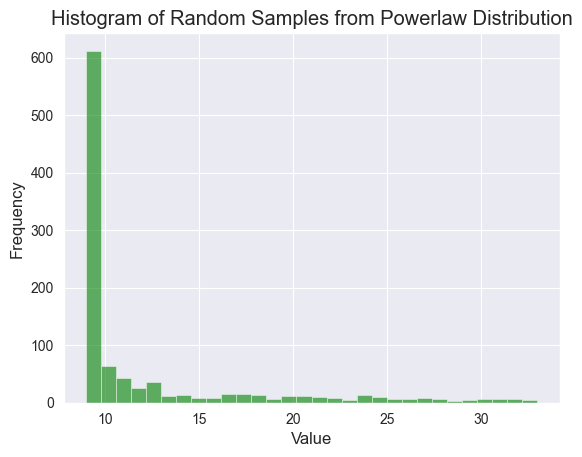

In [234]:
generate_and_plot_distribution("powerlaw",{'a': 0.14349017715809642, 'loc': 8.999999999999998, 'scale': 24.000000000000004})


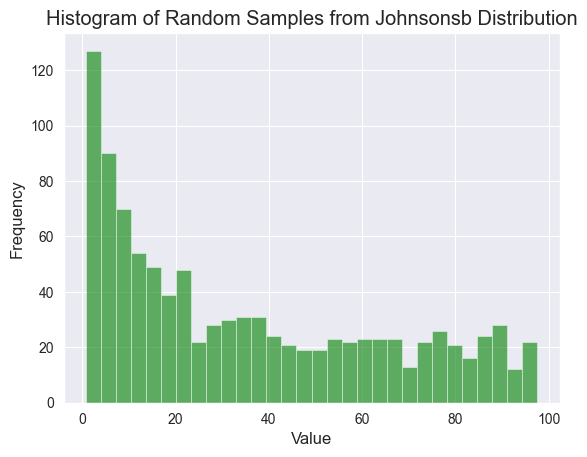

In [235]:
generate_and_plot_distribution("johnsonsb",{'a': 0.42361987798205225, 'b': 0.4946976129904108, 'loc': 0.8047291306002482, 'scale': 97.27293102030796})